# Example 2: Synthetic Nonlinear Dataset
core features = distance from origin

style features = angle

In [1]:
import os
import sys
from pathlib import Path
parent_dir = str(Path().resolve().parent)
sys.path.append(parent_dir)
os.chdir(parent_dir)
import data_handler
import configs
import train
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
SEED = 7

In [2]:
train_ds, test1_ds, test2_ds = data_handler.load_datasets("synthetic")

2024-04-05 13:35:01.549876: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 13:35:03.368473: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 13:35:05.159213: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [3]:
ids = train_ds['id']
unique, counts = np.unique(ids, return_counts=True)
print("Number of IDs occuring more than once: ", np.sum(counts > 1))

max_occ = np.max(counts)
print("Max occurence of an ID: ", max_occ)

Number of IDs occuring more than once:  500
Max occurence of an ID:  2


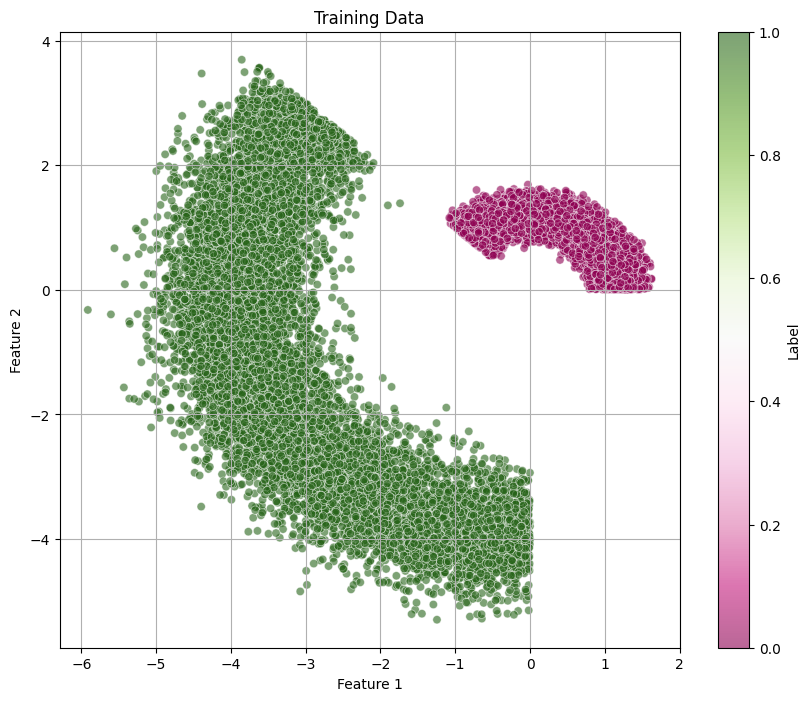

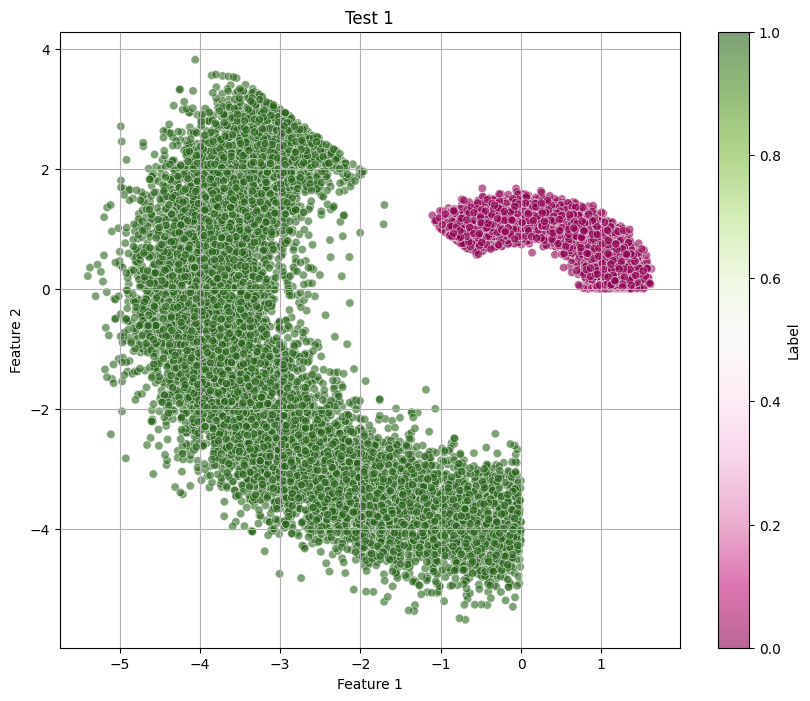

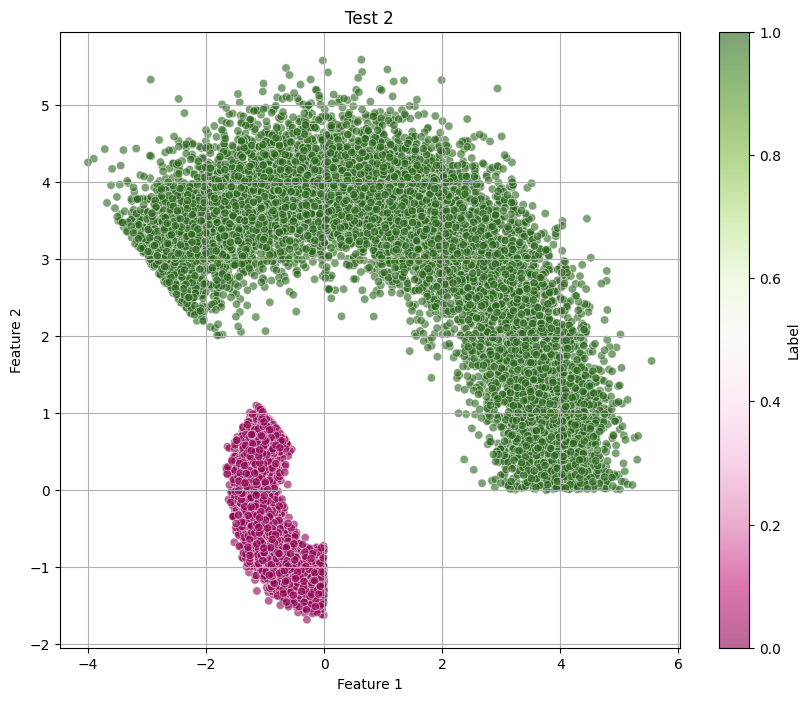

In [4]:
def visualize_data(features_array, labels_array, ids_array=None, title="Data Visualization"):
    features_array = np.array(features_array)
    labels_array = np.array(labels_array)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(features_array[:, 0], features_array[:, 1], c=labels_array, cmap='PiYG', alpha=0.6, edgecolors='w', linewidth=0.5)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(scatter, label='Label')
    
    if ids_array is not None:
        for i, id_ in enumerate(ids_array):
            plt.annotate(id_, (features_array[i, 0], features_array[i, 1]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='gray')
    
    plt.grid(True)
    plt.show()

visualize_data(train_ds['image'], train_ds['label'], title="Training Data")
visualize_data(test1_ds['image'], test1_ds['label'], title="Test 1")
visualize_data(test2_ds['image'], test2_ds['label'], title="Test 2")

In [11]:
config = configs.synthetic_experiment()
config.schedule = "warmup_decay"
config.learning_rate = 1e-2
config.decay_steps = 3000
config.warmup_steps = 500
config.end_learning_rate = 1e-4
config.lambda_core = 100.0
config.cfl_anneal = True
config.no_cfl_frac = 0.1
_ = train.train_and_evaluate(config, workdir=f"results/synthetic_core1", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:epoch: 1, train_loss: 0.8339, train_accuracy: 98.72, test1_accuracy: 100.00, test2_accuracy: 39.55, core_penalty: 0.0062, val_loss: N/A, ids_more_than_once: 0.01
INFO:absl:epoch: 2, train_loss: 0.2563, train_accuracy: 99.99, test1_accuracy: 100.00, test2_accuracy: 35.15, core_penalty: 0.0307, val_loss: N/A, ids_more_than_once: 0.05
INFO:absl:epoch: 3, train_loss: 0.1891, train_accuracy: 98.84, test1_accuracy: 99.82, test2_accuracy: 32.89, core_penalty: 0.0367, val_loss: N/A, ids_more_than_once: 0.04
INFO:absl:epoch: 4, train_loss: 0.4311, train_accuracy: 99.95, test1_accuracy: 100.00, test2_accuracy: 26.31, core_penalty: 0.7714, val_loss: N/A, ids_more_than_once: 0.06
INFO:absl:epoch: 5, train_loss: 0.0723, train_accuracy: 99.95, test1_accuracy: 99.97, test2_accuracy: 40.02, core_penalty: 0.0000, val_loss: N/A, ids_more_than_once: 0.00
INFO:absl:epoch: 6, train_loss: 90.6476, train_accuracy: 89.07, test1_accuracy: 92.48, test2_accuracy: 54.12, core_penalty: 10.3980, val_loss:

In [12]:
config = configs.synthetic_experiment()
config.schedule = "warmup_decay"
config.learning_rate = 1e-2
config.decay_steps = 3000
config.warmup_steps = 500
config.end_learning_rate = 1e-4
config.lambda_core = 0.0
config.cfl_anneal = False
_ = train.train_and_evaluate(config, workdir=f"results/synthetic_pool1", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:epoch: 1, train_loss: 0.8339, train_accuracy: 98.72, test1_accuracy: 100.00, test2_accuracy: 39.55, core_penalty: 0.0062, val_loss: N/A, ids_more_than_once: 0.01
INFO:absl:epoch: 2, train_loss: 0.2563, train_accuracy: 99.99, test1_accuracy: 100.00, test2_accuracy: 35.15, core_penalty: 0.0307, val_loss: N/A, ids_more_than_once: 0.05
INFO:absl:epoch: 3, train_loss: 0.1891, train_accuracy: 98.84, test1_accuracy: 99.82, test2_accuracy: 32.89, core_penalty: 0.0367, val_loss: N/A, ids_more_than_once: 0.04
INFO:absl:epoch: 4, train_loss: 0.4311, train_accuracy: 99.95, test1_accuracy: 100.00, test2_accuracy: 26.31, core_penalty: 0.7714, val_loss: N/A, ids_more_than_once: 0.06
INFO:absl:epoch: 5, train_loss: 0.0723, train_accuracy: 99.95, test1_accuracy: 99.97, test2_accuracy: 40.02, core_penalty: 0.0000, val_loss: N/A, ids_more_than_once: 0.00
INFO:absl:epoch: 6, train_loss: 0.8184, train_accuracy: 98.56, test1_accuracy: 99.99, test2_accuracy: 36.98, core_penalty: 0.5124, val_loss: N